In [3]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt 
import numpy as np  
import seaborn as sns

In [4]:
df=pd.read_excel(r"D:\Final_Project\RISK_LEVEL_CLASSIFICATION\risk_level.xlsx")

In [5]:
df.head()   

,age,diet,exercise_days,sleep_hours,stress,bmi,smoking,alcohol,family_history,risk_level
0,56,Poor,3,4,High,19.9,No,High,Yes,High
1,69,Average,2,5,High,33.9,No,Low,Yes,High
2,46,Average,7,12,Medium,31.0,Yes,Low,Yes,Medium
3,32,Good,1,11,High,38.1,No,High,No,Medium
4,60,Good,6,11,Low,34.6,No,Low,Yes,Medium


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4000 non-null   int64  
 1   diet            4000 non-null   object 
 2   exercise_days   4000 non-null   int64  
 3   sleep_hours     4000 non-null   int64  
 4   stress          4000 non-null   object 
 5   bmi             4000 non-null   float64
 6   smoking         4000 non-null   object 
 7   alcohol         4000 non-null   object 
 8   family_history  4000 non-null   object 
 9   risk_level      4000 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 312.6+ KB


In [7]:
df.describe()

,age,exercise_days,sleep_hours,bmi
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,49.203500,3.454250,7.557500,27.740250
std,18.166593,2.322231,2.852232,7.186699
min,18.000000,0.000000,3.000000,15.000000
25%,34.000000,1.000000,5.000000,21.600000
50%,49.000000,3.000000,8.000000,27.900000
75%,65.000000,6.000000,10.000000,33.800000
max,80.000000,7.000000,12.000000,40.000000


In [8]:
df.isnull().sum()

age               0
diet              0
exercise_days     0
sleep_hours       0
stress            0
bmi               0
smoking           0
alcohol           0
family_history    0
risk_level        0
dtype: int64

In [9]:
df['risk_level'].value_counts()

risk_level
Medium    2289
Low       1608
High       103
Name: count, dtype: int64

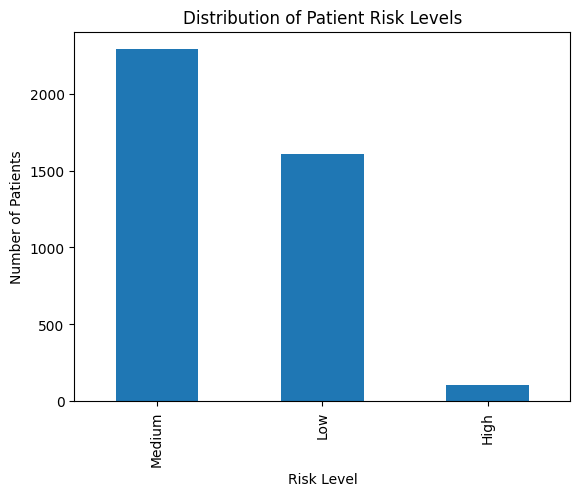

In [10]:
df['risk_level'].value_counts().plot(kind='bar')
plt.xlabel('Risk Level')
plt.ylabel('Number of Patients')
plt.title('Distribution of Patient Risk Levels')
plt.show()

Low risk dominates (realistic population health data)

High-risk patients are rare → class imbalance

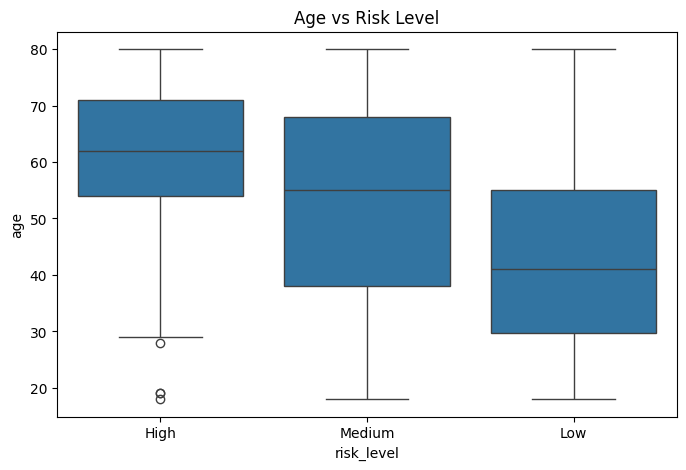

In [11]:
#Age Distribution vs Risk Level
plt.figure(figsize=(8,5))
sns.boxplot(x="risk_level", y="age", data=df)
plt.title("Age vs Risk Level")
plt.show()

🧠 Insights

Median age increases from Low → Medium → High

Age is a strong risk indicator

Confirms model learning is medically meaningful

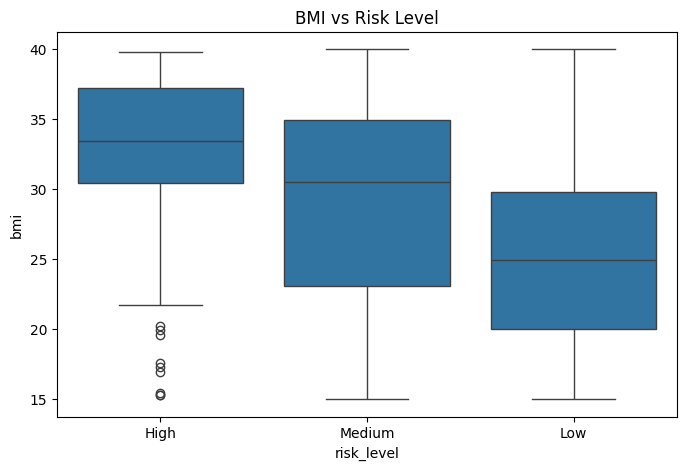

In [12]:
#BMI vs Risk Level
plt.figure(figsize=(8,5))
sns.boxplot(x="risk_level", y="bmi", data=df)
plt.title("BMI vs Risk Level")
plt.show()

🧠 Insights

Higher BMI → higher risk

Obesity clusters in Medium & High risk

BMI is a key modifiable risk factor

In [13]:
df.head()

,age,diet,exercise_days,sleep_hours,stress,bmi,smoking,alcohol,family_history,risk_level
0,56,Poor,3,4,High,19.9,No,High,Yes,High
1,69,Average,2,5,High,33.9,No,Low,Yes,High
2,46,Average,7,12,Medium,31.0,Yes,Low,Yes,Medium
3,32,Good,1,11,High,38.1,No,High,No,Medium
4,60,Good,6,11,Low,34.6,No,Low,Yes,Medium


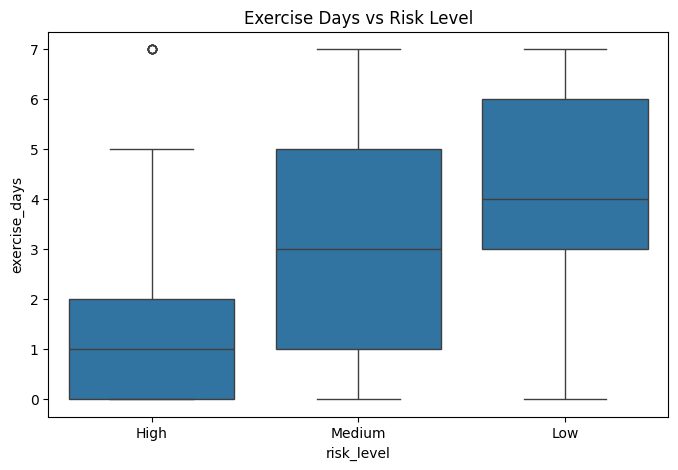

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x="risk_level", y="exercise_days", data=df)
plt.title("Exercise Days vs Risk Level")
plt.show()

📉 As exercise days decrease → risk increases

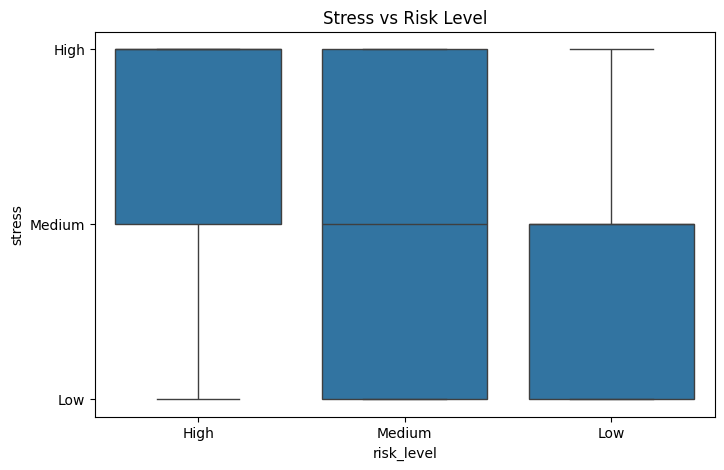

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(x="risk_level", y="stress", data=df)
plt.title("Stress vs Risk Level")
plt.show()

High-risk patients predominantly show medium to high stress levels

Medium-risk patients display a wide stress range, indicating mixed mental health states

Low-risk patients mostly experience low to medium stress

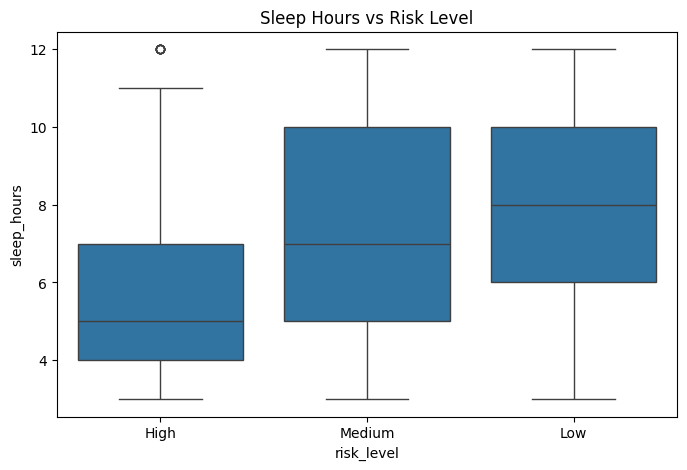

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x="risk_level", y="sleep_hours", data=df)
plt.title("Sleep Hours vs Risk Level")
plt.show()

High-risk patients sleep the least (median ≈ 5 hours), indicating sleep deprivation

Medium-risk patients show moderate sleep (≈ 6–7 hours) with high variability

Low-risk patients get the most consistent and adequate sleep (≈ 7–8 hours)

In [17]:
risk_mapping = {
    "Low": 0,
    "Medium": 1,
    "High": 2
}

inverse_risk_mapping = {v: k for k, v in risk_mapping.items()}

df["risk_level"] = df["risk_level"].map(risk_mapping)

In [18]:
df.head()

,age,diet,exercise_days,sleep_hours,stress,bmi,smoking,alcohol,family_history,risk_level
0,56,Poor,3,4,High,19.9,No,High,Yes,2
1,69,Average,2,5,High,33.9,No,Low,Yes,2
2,46,Average,7,12,Medium,31.0,Yes,Low,Yes,1
3,32,Good,1,11,High,38.1,No,High,No,1
4,60,Good,6,11,Low,34.6,No,Low,Yes,1


In [19]:



# mapping dictionary for stress
stress_mapping = {
    "Low": 0,
    "Medium": 1,
    "High": 2
}

# apply mapping
df["stress"] = df["stress"].map(stress_mapping)
diet_mapping = {
    "Poor": 0,
    "Average": 1,
    "Good": 2
}

# apply mapping
df["diet"] = df["diet"].map(diet_mapping)
smoking_mapping = {
    "No": 0,
    "Yes": 1}
df["smoking"] = df["smoking"].map(smoking_mapping)
alcohol_mapping = {
    "Low": 0,
    "Medium": 1,
    "High": 2}
df["alcohol"] = df["alcohol"].map(alcohol_mapping)

In [20]:
history_mapping = {
    "Yes": 1,
    "No": 0}
df["family_history"] = df["family_history"].map(history_mapping)

In [21]:
X = df.drop("risk_level", axis=1)
y = df["risk_level"]

In [22]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE(
    sampling_strategy="auto",   # balance all classes
    random_state=42,
    k_neighbors=5
)

X_resampled, y_resampled = smote.fit_resample(X, y)
print("Before SMOTE:", Counter(y))
print("After SMOTE:", Counter(y_resampled))

Before SMOTE: Counter({1: 2289, 0: 1608, 2: 103})
After SMOTE: Counter({2: 2289, 1: 2289, 0: 2289})


In [23]:
# 4. Train-Test Split (Stratified)
# =========================================
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled,
    y_resampled,
    test_size=0.2,
    random_state=42
)

In [24]:
# 4. Build ML Pipeline
# ===============================
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(
    max_iter=3000,
    class_weight="balanced",
    random_state=42
)   
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,3000
,multi_class,'deprecated'


In [26]:
y_pred_lr=lr.predict(X_test)
y_pred_lr   

array([2, 0, 1, ..., 1, 1, 2], dtype=int64)

In [27]:
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 83.92%


In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_lr, target_names=["Low", "Medium", "High"]))

              precision    recall  f1-score   support

         Low       0.85      0.85      0.85       482
      Medium       0.77      0.74      0.75       454
        High       0.90      0.92      0.91       438

    accuracy                           0.84      1374
   macro avg       0.84      0.84      0.84      1374
weighted avg       0.84      0.84      0.84      1374



In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred_lr, average="weighted")
print(f"Precision: {precision*100:.2f}%") 

Precision: 83.78%


In [30]:
recall = recall_score(y_test, y_pred_lr, average="weighted")
print(f"Recall: {recall*100:.2f}%")
f1 = f1_score(y_test, y_pred_lr, average="weighted")
print(f"F1-score: {f1*100:.2f}%")


Recall: 83.92%
F1-score: 83.84%


In [31]:
# 7. Train Model
# =========================================
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    class_weight="balanced",
    random_state=42
)

rf.fit(X_train, y_train)



,n_estimators,300
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:
y_pred=rf.predict(X_test)
y_pred

array([1, 0, 1, ..., 1, 1, 2], dtype=int64)

In [33]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 98.33%


In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       482
           1       0.99      0.96      0.97       454
           2       0.97      0.99      0.98       438

    accuracy                           0.98      1374
   macro avg       0.98      0.98      0.98      1374
weighted avg       0.98      0.98      0.98      1374



In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, average="weighted")
print(f"Precision: {precision*100:.2f}%") 
      

Precision: 98.34%


In [36]:
recall = recall_score(y_test, y_pred, average="weighted")
print(f"Recall: {recall*100:.2f}%")

Recall: 98.33%


In [37]:
f1 = f1_score(y_test, y_pred, average="weighted")
print(f"F1-score: {f1*100:.2f}%")

F1-score: 98.32%


In [38]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[482   0   0]
 [  4 436  14]
 [  0   5 433]]


In [37]:
# 9. Save Model (PICKLE)
# ==============================
import pickle
with open("risk_level_model.pkl", "wb") as f:
    pickle.dump({
        "model": rf,
        "risk_map": risk_mapping,
        "inverse_risk_map": inverse_risk_mapping,
        "features": X.columns.tolist()
    }, f)

print("\n✅ Model saved as risk_level_model.pkl")


✅ Model saved as risk_level_model.pkl
